In [72]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

#Load Data, Poke Around at it

In [73]:
complaints = pd.read_csv("Consumer_Complaints.csv", low_memory=False, 
                         parse_dates=["Date received", "Date sent to company"])

In [74]:
complaints.head(3)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1382851,Debt collection,"Other (phone, health club, etc.)",False statements or representation,Attempted to collect wrong amount,IN,46403,Web,2015-05-19,2015-05-19,"Diversified Consultants, Inc.",Closed with explanation,Yes,NaN
1,1383126,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Right to dispute notice not received,GA,30096,Web,2015-05-19,2015-05-19,Stellar Recovery Inc.,Closed with explanation,Yes,NaN
2,1383251,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Right to dispute notice not received,WA,98055,Web,2015-05-19,2015-05-19,Stellar Recovery Inc.,Closed with explanation,Yes,NaN


In [75]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393491 entries, 0 to 393490
Data columns (total 14 columns):
Complaint ID            393491 non-null int64
Product                 393491 non-null object
Sub-product             270285 non-null object
Issue                   393485 non-null object
Sub-issue               121948 non-null object
State                   387998 non-null object
ZIP code                389029 non-null float64
Submitted via           393491 non-null object
Date received           393491 non-null datetime64[ns]
Date sent to company    393491 non-null datetime64[ns]
Company                 393491 non-null object
Company response        393491 non-null object
Timely response?        393491 non-null object
Consumer disputed?      361320 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(10)
memory usage: 45.0+ MB


In [76]:
complaints.columns

Index(['Complaint ID', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'State',
       'ZIP code', 'Submitted via', 'Date received', 'Date sent to company',
       'Company', 'Company response', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')

In [77]:
print(complaints["Product"][0])
print(type(complaints["Product"][0]))
print(complaints["Date received"].head(2))
print(complaints["Date received"][0])
print(type(complaints["Date received"][0]))

Debt collection
<class 'str'>
0   2015-05-19
1   2015-05-19
Name: Date received, dtype: datetime64[ns]
2015-05-19 00:00:00
<class 'pandas.tslib.Timestamp'>


#Complaints by Month

In [78]:
complaints.index = pd.to_datetime(complaints["Date received"])

In [79]:
complaints.Product.head(3)

Date received
2015-05-19    Debt collection
2015-05-19    Debt collection
2015-05-19    Debt collection
Name: Product, dtype: object

In [80]:
by_month = complaints.Product.resample("M", how=["count"])

In [81]:
by_month.head()

,count
Date received,
2011-12-31,2556
2012-01-31,3266
2012-02-29,3507
2012-03-31,6247
2012-04-30,5725


In [84]:
by_month.ix[-1]

count    3586
Name: 2015-05-31 00:00:00, dtype: int64

In [85]:
by_month = by_month.drop(by_month.index[-1])

In [86]:
by_month.tail(3)

,count
Date received,
2015-02-28,12709
2015-03-31,14558
2015-04-30,13442


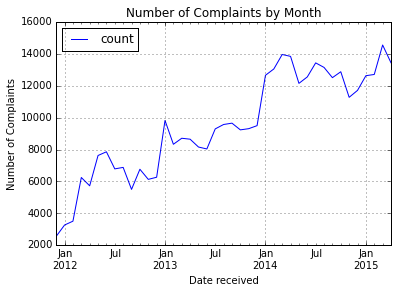

In [87]:
by_month.plot()
plt.title("Number of Complaints by Month")
plt.ylabel("Number of Complaints")
plt.show()

After some searching around online, this fast growth in recent years looks consistent with reality. The bureau was created not long before the start of this graph. It stands to reason that its role has not fully matured and that it will experience rapid growth in reports until it does.

#Number of Complaints by Product

In [89]:
complaints.index = complaints["Product"] # did not pop the date received, so table does not need to be reloaded

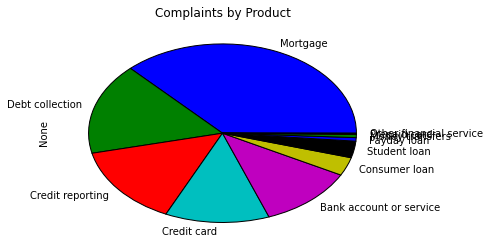

In [97]:
complaints["Product"].value_counts().plot(kind="pie")
plt.title("Complaints by Product")
plt.show()

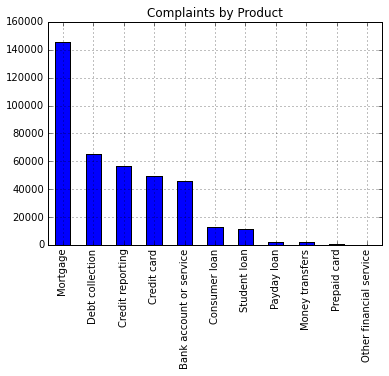

In [98]:
complaints["Product"].value_counts().plot(kind="bar")
plt.title("Complaints by Product")
plt.show()

This info is also consistent with the news on the subject. Mortages, debt collection, and credit reporting contain an obvious conflict of interest between the consumer and the company involved. Many people have problems with mortagage affordibility and complain because of a refusal to restructure the debt or poor terms that are offered. Considering the large number of people obliged to a mortage also clearly contributes to the numbers.

#Number by Company

In [101]:
complaints["Company"].value_counts().ix[1:10]

Wells Fargo            32860
JPMorgan Chase         26088
Experian               20027
Citibank               19494
Equifax                19427
Ocwen                  16782
TransUnion             15219
Capital One            12009
Nationstar Mortgage     9660
dtype: int64

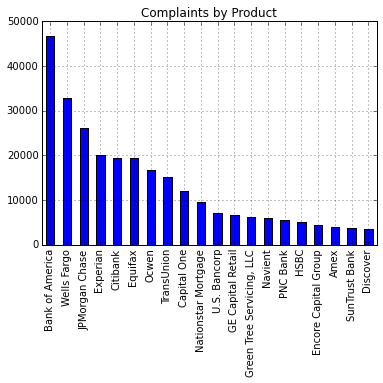

In [103]:
complaints["Company"].value_counts()[:20].plot(kind="bar")
plt.title("Complaints by Product")
plt.show()

This is also not very surprising. Some of the largest and most well-known banks come first, clearly because of the large number of customers they have. Some credit reporting agencies are thrown in there as well, notably Experian and Equifax. The subsequent companies seem to go into a wider variety of products.

#Number by Company Response

In [107]:
complaints["Company response"].value_counts()

Closed with explanation            277554
Closed with non-monetary relief     50213
Closed with monetary relief         28024
Closed without relief               17909
Closed                               9551
Closed with relief                   5305
In progress                          3107
Untimely response                    1828
dtype: int64

Note that this only has 8 categories. It is also important to consult the original counts, and this has fully 393491 entries. That means that every entry had this field filled, and it is very clean data. It seems certain that the bureau forces this response to be one of a small list of pre-selected options.

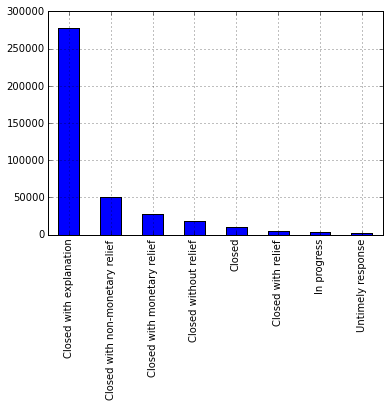

In [109]:
complaints["Company response"].value_counts().plot("bar")
plt.show()

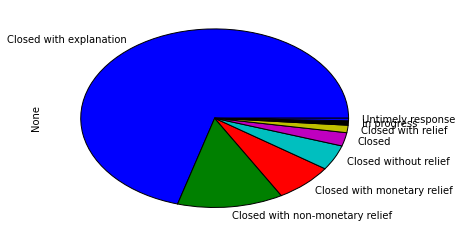

In [110]:
complaints["Company response"].value_counts().plot("pie")
plt.show()

#By Day of Week

In [112]:
complaints.index = pd.to_datetime(complaints["Date received"])

In [114]:
dow = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

In [115]:
complaints["day_of_week"] = complaints.index.to_series().map(lambda d: d.weekday())

In [118]:
print(complaints["day_of_week"].ix[:2]) # seems to be working
print(complaints["day_of_week"].ix[-2:])

Date received
2015-05-19    1
2015-05-19    1
Name: day_of_week, dtype: int64
Date received
2011-12-01    3
2011-12-01    3
Name: day_of_week, dtype: int64


In [120]:
complaints["day_of_week"].value_counts().sort_index() # seems like a reasonable list

0    71313
1    74170
2    76118
3    72707
4    63863
5    19109
6    16211
dtype: int64

In [122]:
weekday_plot = complaints["day_of_week"].value_counts().sort_index()

In [123]:
weekday_plot.index = dow

In [124]:
print(weekday_plot)

Sunday       71313
Monday       74170
Tuesday      76118
Wednesday    72707
Thursday     63863
Friday       19109
Saturday     16211
dtype: int64


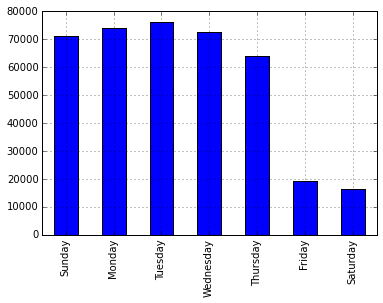

In [127]:
weekday_plot.plot("bar")
plt.show()

People apparently seem to log fewer complaints on the weekend. This seems like a reasonable conclusion. It might be because they interact with the finance companies more often during the weekdays in the first place. The reporting system seems to be online, so this is the best explination I have. People still might assume that their claim will be processed faster during the weekday, or a host of other possible reasons.